##Project Structure

1. Extracting data
2. Exploratory Data analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("data/stud.csv")
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
dataset.shape

(1000, 8)

In [5]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Checking for Null values in the data

In [6]:
dataset.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values in the dataset

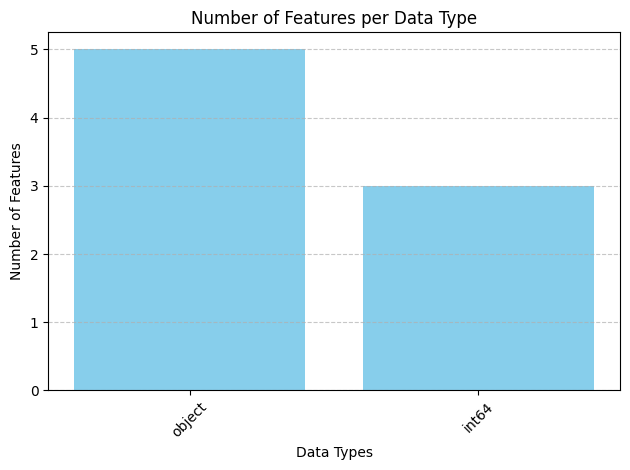

In [7]:
dtype_counts = dataset.dtypes.value_counts()
plt.bar(dtype_counts.index.astype(str), dtype_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Data Types')
plt.ylabel('Number of Features')
plt.title('Number of Features per Data Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

There are two datatypes (object) and (int 64). objects 5 and ints 3

In [9]:
dataset['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [10]:
dataset['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
dataset['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

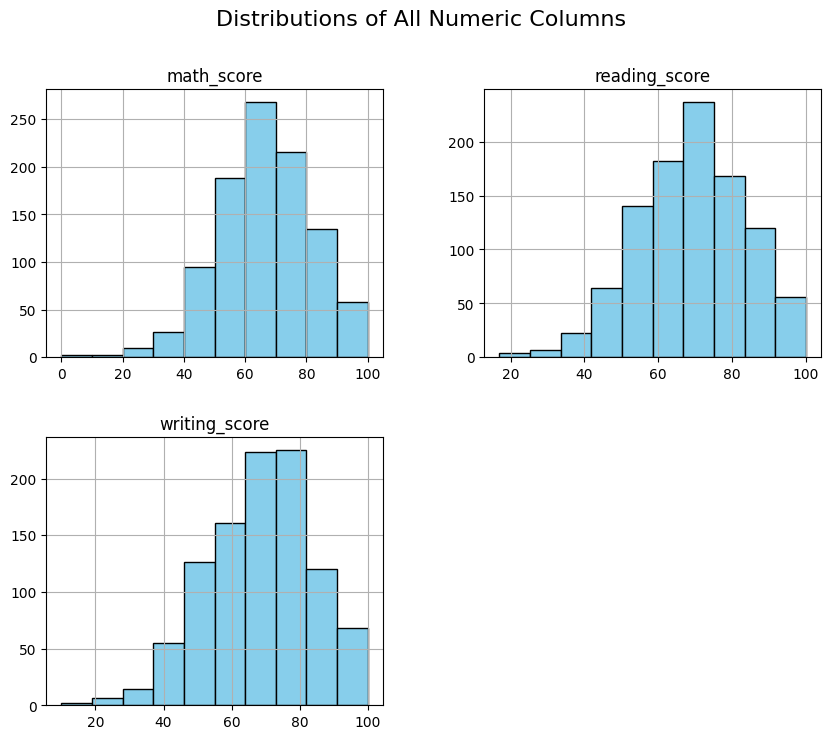

In [12]:
dataset.hist(figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of All Numeric Columns", fontsize=16)
plt.show()

Create columns for **Total Score** and **Average Score**.

In [13]:
dataset['total_score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']
dataset.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [14]:
dataset['average_score'] = round(dataset['total_score'] / 3, 1)
dataset.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7
1,female,group C,some college,standard,completed,69,90,88,247,82.3


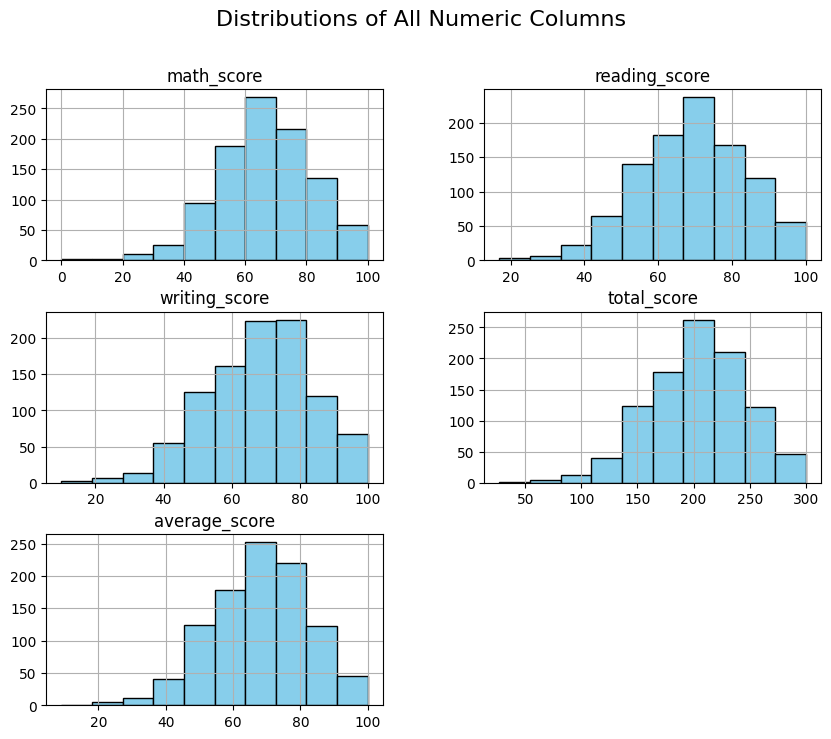

In [15]:
dataset.hist(figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of All Numeric Columns", fontsize=16)
plt.show()

In [16]:
maths_below_20 = dataset[dataset['math_score'] <= 20].count()
reading_below_20 = dataset[dataset['reading_score'] <= 20].count()
writing_below_20 = dataset[dataset['writing_score'] <= 20].count()


key insight: reading has the least failures 

In [17]:
math_toppers = dataset[dataset['math_score'] == 100].count()
reading_toppers = dataset[dataset['reading_score'] == 100].count()
writing_toppers = dataset[dataset['writing_score'] == 100].count()

reading has the highest number of toppers, followed by writing and then math

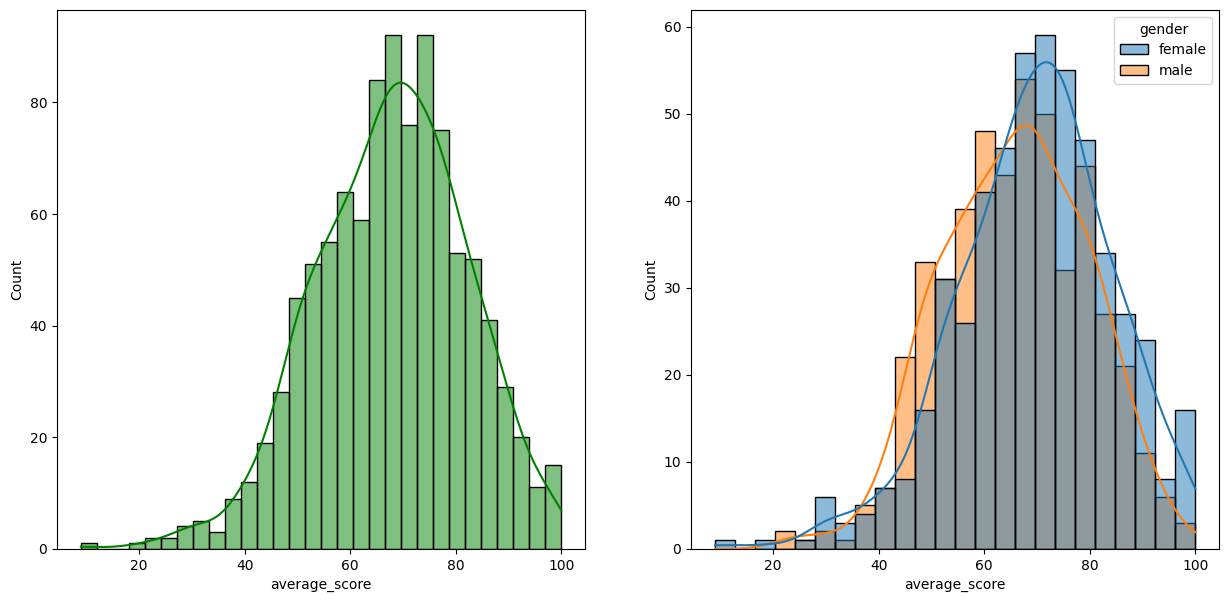

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='average_score',kde=True,hue='gender')
plt.show()

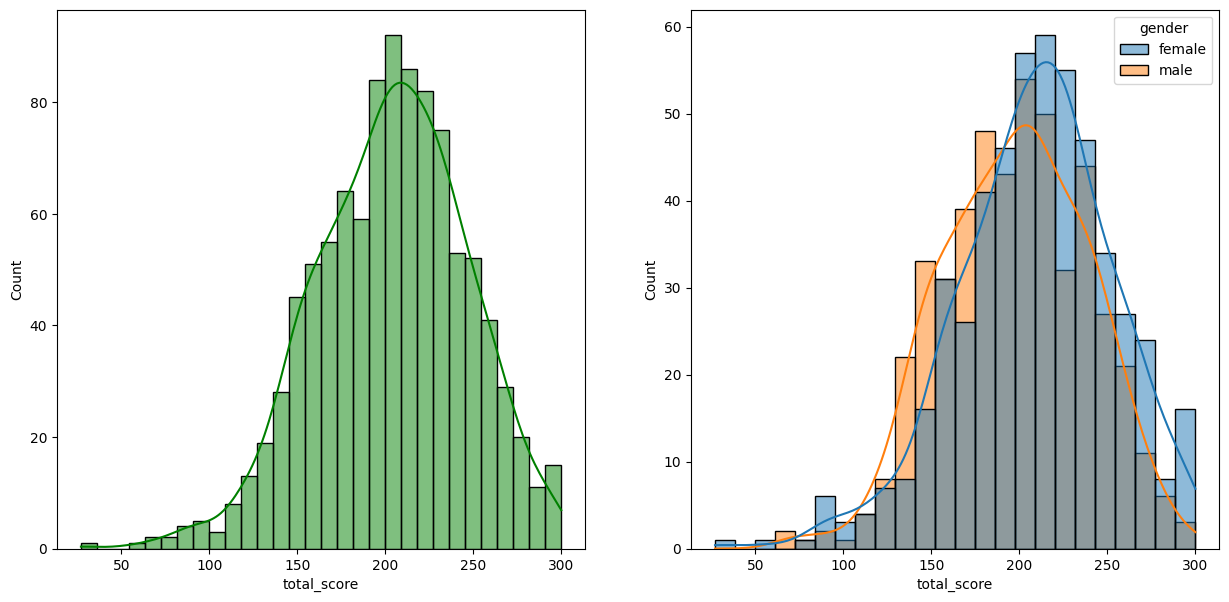

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='total_score',kde=True,hue='gender')
plt.show()

In [20]:
dataset.to_csv("data/dataset_final.csv")